In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
from surprise import SVD
from surprise import Reader
from surprise import Dataset
from surprise import evaluate, print_perf
from surprise import accuracy
import seaborn as sns
import numpy as np

from flurs.data.entity import User, Item, Event

In [2]:
all_data=pd.read_csv('ratings2.csv',sep=',', names=['user_id','item_id','rating','timestamp'])
all_data.head()

,user_id,item_id,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [3]:
user_ids = list(set(all_data.user_id.unique()))
item_ids = list(set(all_data.item_id.unique()))

In [4]:
user_ids

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [5]:
item_ids

[1,
 5,
 2054,
 7,
 4103,
 57353,
 3258,
 11,
 6,
 6157,
 16,
 17,
 2064,
 122904,
 25,
 57368,
 2072,
 29,
 32,
 2081,
 34,
 36,
 44,
 47,
 2095,
 50,
 51255,
 58,
 2108,
 88125,
 116797,
 2110,
 64,
 88129,
 55363,
 2116,
 53318,
 30793,
 53322,
 73,
 79,
 82,
 2136,
 2144,
 97,
 2150,
 107,
 59501,
 110,
 2160,
 2163,
 49272,
 123,
 125,
 2174,
 49280,
 4226,
 135,
 141,
 4238,
 2193,
 2194,
 147,
 150,
 4246,
 153,
 155,
 157,
 160,
 162,
 165,
 170,
 175,
 8368,
 176,
 57528,
 6333,
 2240,
 194,
 4291,
 2243,
 2245,
 198,
 2248,
 2252,
 208,
 4306,
 69844,
 4308,
 51412,
 2263,
 51418,
 2266,
 2268,
 6365,
 223,
 231,
 232,
 6377,
 235,
 33004,
 2291,
 246,
 247,
 2294,
 2300,
 2302,
 61697,
 260,
 2312,
 2313,
 4361,
 4366,
 39183,
 4367,
 2321,
 4370,
 53519,
 2324,
 273,
 92439,
 2331,
 2333,
 2334,
 2338,
 47394,
 290,
 293,
 296,
 2348,
 301,
 53550,
 2355,
 307,
 309,
 2363,
 168252,
 318,
 322,
 57669,
 4424,
 334,
 337,
 339,
 51540,
 8533,
 342,
 2391,
 344,
 2394,
 4443,

In [6]:
from flurs.recommender.user_knn import UserKNNRecommender
recommender = UserKNNRecommender(k=3)  # consider 3 nearest-neighbors
recommender.initialize()

In [71]:
#users = [User(u) for u in user_ids]
users = []


for index, elem in enumerate(user_ids):
    user = User(index, elem) 
    users[index] = item


users

IndexError: list assignment index out of range

In [31]:
#items = [Item(i) for i in item_ids] -- 168252
#item_ids

In [67]:
items = {}

for index, elem in enumerate(item_ids):
    item = Item(index, elem) 
    items[elem] = item
    
#items

In [33]:
for user in users:
    recommender.register(user) 
  

In [34]:
for item in items:
    recommender.register(item)

In [35]:
all_data.shape

(1000, 4)

In [36]:
all_data.dtypes


user_id        int64
item_id        int64
rating       float64
timestamp      int64
dtype: object

In [66]:
for index, row in all_data.iterrows():
    user_id = int(row['user_id'])
    item_id  = int(row['item_id'])
    rating  = row['rating']
    user = users[user_id] 
 
    print(user)
    print(item_id)
    print(rating)
    print(u_index)
    print(i_index)
    i_index = item_ids.index(item_id)
    
    
    user = User(u_index, users[user_id])
    item = Item(i_index, items[item_id])
    print(str(user))
    print(item)

    event = Event(user, item, value=rating,  context=np.array([0.]))
    event = Event(user, item)
    print (event)
            
    print(".............")

    recommender.update(event)

    

TypeError: object of type 'numpy.int64' has no len()

In [39]:
candidates = np.array(item_ids)
recommended_items, scores = recommender.recommend(users[0], candidates)

In [40]:
print(recommended_items[0])
print(scores[0])

59387
1.0


In [59]:
recommender.recommend(users[1], candidates[200:])

(array([ 59387,  58306,   3036,   3030,    969,   5064,   3016,    968,
         58303,    994,   5054,   3005,   3004,    953,  58295,   2997,
          3037,   3052,  48043,  33794,   1037,   1036,   3082,   3079,
          3077,   5125,   5120,  60397,  54272,   1023,  35836,   3066,
         54259,   7153,    940,   5036,   1041,  56174,    899,   4995,
          4993,   2944,   4980,   4979,  37741,    903,   4973,  56171,
          4971,   2919,   2918,   2916,   2947,    904,   2987,   5013,
          5033,   2985,   5026,    926,   5016,    916,  50068,   2951,
         33679,   5008,    912,   2959,    908,   5002,  54286,   3091,
           866,   1188,   1198,   1197,   1196,   1193,   1192,  44199,
          1185,  48304,   1184,   1183,   1177,   1172,   3203,   3198,
          1199,   1201,   1148,   1210,   1216,  58559,   1214,   1213,
          1208,   1211,   1206,   1200,   1207,   3255,  62644,   7347,
          1204,   5299,   3197,   1147,  56339,   1060,   1079, 

In [53]:
from flurs.evaluator import Evaluator

evaluator = Evaluator(recommender)

In [55]:
events = [Event(users[user_ids.index(int(round(row['user_id'])))],items[item_ids.index(int(round(row['item_id'])))],context=np.array([row['rating']])) for index, row in all_data.iterrows()]



In [56]:
evaluator.fit(events[:300], events[300:500])

from collections import deque
window = deque(maxlen=200)

Z:\Software\miniconda\envs\surprise\lib\site-packages\flurs\model\user_knn.py:80: RuntimeWarning: invalid value encountered in sqrt
  self.S[ua, idx] = self.B[ua, idx] / (np.sqrt(self.C[ua, idx]) * np.sqrt(self.D[ua, idx]))


In [57]:
accuracy = []
for top_score, rank, recommend_time, update_time in evaluator.evaluate(events[300:]):
    window.append(int(rank < 10))  # consider top-10 recommendation
    accuracy.append(sum(window) / len(window))

Z:\Software\miniconda\envs\surprise\lib\site-packages\flurs\model\user_knn.py:80: RuntimeWarning: invalid value encountered in sqrt
  self.S[ua, idx] = self.B[ua, idx] / (np.sqrt(self.C[ua, idx]) * np.sqrt(self.D[ua, idx]))


Text(0,0.5,'recall (window size = 200)')

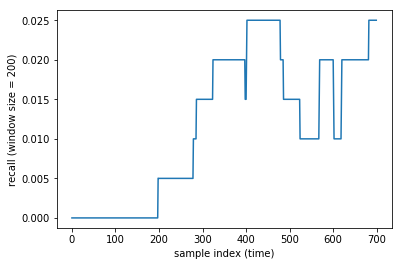

In [58]:
plt.plot(accuracy)
plt.xlabel('sample index (time)')
plt.ylabel('recall (window size = 200)')